# Processing a Folder of Tip Logs
Tim Tyree<br>
6.22.2021

In [1]:
from lib.my_initialization import *
from lib import *
from lib.my_initialization import *
from lib.utils.utils_traj import *
from lib.utils.operari import *

import trackpy, pandas as pd, numpy as np
from lib import *
from lib.routines.track_tips import *
from lib.utils.dist_func import *
from lib.utils.utils_traj import *

from lib.routines.compute_trajectories import *
from lib.routines.dag_log_to_msd import *
from lib.routines.compute_msd import *

import trackpy
%autocall 1
%load_ext autoreload
%autoreload 2
# awareness&chill

Automatic calling is: Smart


In [2]:
darkmode=False
if darkmode:
    # For darkmode plots
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# particle tracking and computation of mean squared displacements for a folder of tip logs

In [5]:
# #find file interactively
# print("please select a file from within the desired folder.")
file = search_for_file()
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/Log/ic001.21_log.csv'
print(file)
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_2_param_set_8/Log/ic_200x200.001.12_log.csv'

ds=10
width=10
# ds=5
# width=200
height=width
DS=ds/width

# # input_fn=search_for_file()
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# df=pd.read_csv(input_fn)
# print(input_fn)
# DT=compute_DT(df,round_t_to_n_digits=3);print(f"the time resolution is {DT} ms.")


trgt='log.csv'
assert(file[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(file,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

File: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv
/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories_unwrap/pbc_particle_log121_traj_sr_30_mem_0_unwrap.csv


AssertionError: 

In [4]:
#works for repositories outside of care
input_fn=file
trial_folder_name=os.path.dirname(os.path.dirname(input_fn))
ic_suite_fn=os.path.dirname(trial_folder_name)
# ic_suite_fn=ic_suite_fn.split('/')[-1]
print(ic_suite_fn)
trial_folder_name=trial_folder_name.split('/')[-1]
print(trial_folder_name)

In [30]:
# input_fn=file
# os.path.dirname(input_fn)
# str_lst=input_fn[input_fn.find('/Data/')+len('/Data/'):].split('/')
# ic_suite_fn=f"{nb_dir}/Data/"+str_lst[0]
# trial_folder_name=str_lst[1]
# print(ic_suite_fn)
# print(trial_folder_name)

In [31]:
#generate trajectories, unwrapped trajectories, and mean squared displacements for folder of tip logs
npartitions=os.cpu_count()

#particle models
ds=10
width=10
kwargs={
    'input_fn_lst':file_name_list,
    'L':width,
    'DS':ds/width,
    'use_cache_0':True,
    'use_cache_1':True,
    'npartitions':npartitions,
    'sr':3*width,
    'mem':0,
    'trial_folder_name':trial_folder_name,
    'ic_suite_fn':ic_suite_fn
}

# #full models
# ds=5
# width=200
# kwargs={
#     'input_fn_lst':file_name_list,
#     'L':width,
#     'DS':ds/width,
#     'use_cache_0':True,
#     'use_cache_1':True,
#     'npartitions':npartitions,
#     'sr':3*width,
#     'mem':0,
#     'trial_folder_name':trial_folder_name,
#     'ic_suite_fn':ic_suite_fn
# }


In [32]:
df_summary=workflow_reduce_logs_to_diffcoeff_summary(**kwargs)
beep(1)

the total number of trials recorded is 200
reducing 200 unwrapped trajectories files to a single row describing the diffusion coefficient of spiral tips for that trial...
Num. file names in list = 200.
saved figure in 
	/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/msd/fig
saved figure in 
	/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/msd/fig
saved figure in 
	/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/msd/fig
generating diffcoeff_figures for euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0
	num. trials that didn't show a tip lasing longer than 150ms is 0, and that didn't show am Rsquared of at least 0.0 is 0
saved diffcoeff_summary to /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/ms

0

In [7]:
#TODO: fix D and Delta_D measurements for functions that compute df_summary

# analyze annihilation/creation events

## annihilation events

In [33]:
#select a file from trajectories/
# input_fn=search_for_file()

#particle model
input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv"
ds=10
width=10


#LR
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic001.21_traj_sr_600_mem_0.csv'
# # input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic002.23_traj_sr_600_mem_0.csv'
# input_fn='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.025/trajectories/ic004.13_traj_sr_600_mem_0.csv'

#FK
# input_fn=f"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.3_traj_sr_400_mem_0.csv"
# ds=5
# width=200

height=width
df=pd.read_csv(input_fn);print(input_fn)
DT=compute_DT(df,round_t_to_n_digits=5);print(f"the time resolution is {DT} ms.")
DS=ds/width

/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv
the time resolution is 0.25 ms.


In [34]:
trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

file_name_list=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(file_name_list)}")
os.chdir(nb_dir)

number of files in list: 200


In [35]:
# df.head()

In [36]:
min_duration=20  #20. #ms
min_range   =1  #cm
filter_beginning=True
use_min_duration=True
use_grad_voltage=False
range_threshold=10 #cm
round_t_to_n_digits=5
tmin=100.


# min_duration=10##20. #ms
# min_range   =1.  #cm
# filter_beginning=True
# use_min_duration=True
# use_grad_voltage=True
# tmin=100#ms
# npartitions=1#1
npartitions=os.cpu_count()

kwargs={
    'width':width,
    'height':height,
    'ds':ds,
    'printing':False,
    'min_range':min_range,
    'min_duration':min_duration,
    'npartitions':npartitions,
    'filter_beginning':filter_beginning,
    'use_grad_voltage':use_grad_voltage,
    'use_min_duration':use_min_duration,
    'range_threshold':range_threshold,
    'round_t_to_n_digits':round_t_to_n_digits,
    'tmin':tmin
}

In [37]:
routine_traj_to_annihilation=get_routine_traj_to_annihilation(**kwargs)
def routine(input_fn):
    return routine_traj_to_annihilation(input_fn)

In [38]:
# df_phases = compute_annihilation_events(input_fn, **kwargs)

# type(df_phases)==type(pd.DataFrame())

In [39]:
#test the routine on one case
# routine(input_fn)

# #already done deep in pipeline
# # def filter_before(df,tmin=100,t_column='t'):
# #     '''filter all time earlier than tmin'''
# #     tmin=100#ms
# #     boo=df[t_column]<tmin
# #     df.drop(df[boo],inplace=True)
# #     return df

In [40]:
# #compute interactions
# df_interactions = compute_df_interactions(input_fn, DS=DS,width=width,height=height,tmin=tmin)
# df_interactions.dropna(inplace=True)
# death_ranges = DS * df_interactions.rT.values
# birth_ranges = DS * df_interactions.r0.values
# df_interactions.head()

In [41]:
# #TODO: investigate 1 annihilation event in detail...
# df.head()

In [42]:
# #TODO: fix this bug... Is df_interactions empty in compute_annihilation_events?
# df_phases = compute_annihilation_events(input_fn, **kwargs)

In [43]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of annihilation events for {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of annihilation events for 200 trajectory .csv files...
token example fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log144_traj_sr_30_mem_0.csv
run time for computing features of annihilation events was 121.07 seconds.


0

In [44]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]

In [45]:
# fn=retval[0]
# type(fn)==type(str())

In [46]:
assert (len(list_of_files)>0)

In [47]:
#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'annihilations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

results saved in:
/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/annihilations_minr_1_mindur_20.csv


## creation events

In [48]:
routine_traj_to_creation=get_routine_traj_to_creation(**kwargs)
def routine(input_fn):
    return routine_traj_to_creation(input_fn)

In [49]:
#find all files matching pattern
trgt_raw='_traj_'
trgt=input_fn[input_fn.find(trgt_raw):]
input_fn_lst=get_all_files_matching_pattern(file=input_fn, trgt=trgt)
print(f"computing features of creation events for {len(input_fn_lst)} trajectory .csv files...")

#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of creation events was {time.time()-start:.2f} seconds.")
beep(3)

computing features of creation events for 200 trajectory .csv files...
run time for computing features of creation events was 118.26 seconds.


0

In [50]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]

print(len(list_of_files))
assert (len(list_of_files)>0)

#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'creations_minr_{min_range}_mindur_{min_duration}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

In [53]:
beep(10)

0

# computing mean radial velocities between nearest neighbors
- DONE: move this routine to its own .py file
- TODO: test this routine on a smaller sample from the same pipeline
- TODO: decide whether this routine can use a smaller sample same pipeline
- TODO: run this routine on many trials

In [7]:
# def routine_for_computing_dRdt_in_bulk(width,
#                                        use_drop_shorter_than=False,
#                                        drop_shorter_than=150,
#                                        round_t_to_n_digits=5,
#                                        frame_min=0,
#                                        num_frames_between=1,
#                                        use_random_frames=False,
#                                        num_random_frames=500):
#     '''
#     Example Usage:
#     routine_for_computing_dRdt_in_bulk=routine_for_computing_dRdt_in_bulk(width)
#     '''
#     dist_thresh=width/2
#     def routine_for_computing_dRdt_in_bulk(input_fn):
#         #load the data
#         df_raw=pd.read_csv(input_fn)
#         DT = compute_DT(df_raw, round_t_to_n_digits=round_t_to_n_digits) #ms/frame
#         DS=ds/width #cm/pixel
#         # print(f"time between two observations is {DT} milliseconds.")
#         if use_drop_shorter_than:
#             #drop any trajectories don't last longer than T_min
#             df_raw=get_all_longer_than(df_raw.copy(),DT,T_min=drop_shorter_than)
#         #     print(f"percent of observations not filtered by minimum duration of {drop_shorter_than} ms was {100*df.size/df_raw.size:.2f}%.")

#         frame_values=np.array(sorted(set(df_raw.frame.values)))#[:-num_frames_between]#not sure if needed, bc 
#         boo=frame_values>=frame_min
#         frame_values=frame_values[boo]
#         #randomly select some frames to sample
#         if use_random_frames:
#             random_frames=np.random.choice(frame_values[boo],size=num_random_frames,replace=False)
#             frames_input=random_frames
#         else:
#             frames_input=frame_values

#         #for each frame considered, measure dRdt and R
#         R_out_lst=[];dRdt_out_lst=[]
#         # for frame in random_frames:
#         frame_final=frames_input[-1]
#         for frame in frames_input:
#             #TODO: extend to consider all pid present in frame
#             R_values, dRdt_values = comp_neighboring_radial_velocities_between_frames(df_raw,frame=frame,num_frames_between=num_frames_between,
#                                     distance_L2_pbc=distance_L2_pbc,dist_thresh=dist_thresh,DS=DS,DT=DT)
#             R_out_lst.extend(R_values)
#             dRdt_out_lst.extend(dRdt_values)
#         #     printProgressBar(frame + 1, frame_final, prefix = 'Progress:', suffix = 'Complete', length = 50)

#         R_values=np.array(R_out_lst)
#         dRdt_values=np.array(dRdt_out_lst)
#         #(optional) bootstrap the output
#         # dict_out=bin_and_bootstrap_xy_values(x=R_values,y=dRdt_values,xlabel='r',ylabel='drdt',bins='auto',min_numobs=None,num_bootstrap_samples=1000)
#         # df_drdt=pd.DataFrame(dict_out)

#         #save the output as csv
#         df_out=pd.DataFrame({
#             'r':R_values,
#             'drdt':dRdt_values,
#         })
#         save_folder='/'.join(os.path.dirname(input_fn).split('/')[:-1])+'/general_radial_velocities'
#         if not os.path.exists(save_folder):
#             os.mkdir(save_folder)
#         os.chdir(save_folder)
#         save_fn=os.path.basename(input_fn).replace('.csv',f'_drdt_distthrsh_{dist_thresh}.csv')
#         df_out.to_csv(save_fn,index=False)
#         return os.path.abspath(save_fn)
#     return routine_for_computing_dRdt_in_bulk

In [13]:
#particle model
input_fn="/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv"
ds=10
width=10;height=width
distance_L2_pbc=get_distance_L2_pbc(width,height)

trgt=input_fn[input_fn.find('_traj_'):]
# trgt='_traj_sr_600_mem_0.csv'
assert(input_fn[-len(trgt):]==trgt)

input_fn_lst=get_all_files_matching_pattern(input_fn,trgt)
print(f"number of files in list: {len(input_fn_lst)}")
os.chdir(nb_dir)
print(input_fn)


num_fn_to_consider=8
input_fn_lst=input_fn_lst[:num_fn_to_consider]
print(f"number of files in list has been limited to {len(input_fn_lst)}")

number of files in list: 200
/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log81_traj_sr_30_mem_0.csv
number of files in list has been limited to 8


In [21]:
num_frames_between=1
drop_shorter_than=150

from lib.routines.compute_dRdt_in_bulk import *
routine_for_computing_dRdt_in_bulk=routine_for_computing_dRdt_in_bulk(width,ds=ds,
                                             num_frames_between=num_frames_between,
                                             drop_shorter_than=drop_shorter_than)
def routine(input_fn):
    return routine_for_computing_dRdt_in_bulk(input_fn)

__Run Times__
- It took ~35 minutes to run 1 trial on 1 core in a dense way
- It took 1 day and 8.5 hours to run 200 trials on 8 cores in a dense way
- It took ?? to run 8 trials on 8 cores in a dense way
- Is there a difference in the mean dRdt versus R for ^these?

In [22]:
npartitions=os.cpu_count()
print(f"mean radial velocities the bulk of {len(input_fn_lst)} trajectory .csv files...")
print(f"token example fn: {input_fn_lst[0]}")
#all CPU version
b = db.from_sequence(input_fn_lst, npartitions=npartitions).map(routine)
start = time.time()
retval = list(b)
print(f"run time for computing features of annihilation events was {time.time()-start:.2f} seconds.")
beep(3)

mean radial velocities the bulk of 8 trajectory .csv files...
token example fn: /Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/trajectories/pbc_particle_log144_traj_sr_30_mem_0.csv
run time for computing features of annihilation events was 6408.51 seconds.


0

In [23]:
list_of_files=retval
list_of_files=[fn for fn in list_of_files if type(fn)==type(str()) and fn.find('Warning:')==-1]
# list_of_files=[fn for fn in list_of_files if fn.find('Warning:')==-1]

print(f"number of output files: {len(list_of_files)}")
assert (len(list_of_files)>0)

#merge all csv files into one big-ol' csv file
file_out=os.path.join(os.path.dirname(os.path.dirname(list_of_files[0])),f'general_numframesbetween_{num_frames_between}_dropshorterthan_{drop_shorter_than}_numfn_{num_fn_to_consider}.csv')
reval=produce_one_csv(list_of_files, file_out)#, encoding="utf-8")
print('results saved in:')
print(file_out)

number of output files: 8
results saved in:
/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150_numfn_8.csv


In [49]:
beep(4)
file_out

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150_numfn_8.csv'

In [2]:
#all files took a day
aggregated_fn='/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150.csv'
# #8 files took 1 hour and 46 minutes? 
# aggregated_fn='/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150_numfn_8.csv'

#TODO: try #5 or 20 files and time
# aggregated_fn='/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150_numfn_5.csv'
# aggregated_fn=file_out
df=pd.read_csv(aggregated_fn)

In [51]:
R_values=df['r'].values
dRdt_values=df['drdt'].values

In [36]:
# (optional) bootstrap the output
bins='auto'#50#
dict_out=bin_and_bootstrap_xy_values(x=R_values,y=dRdt_values,xlabel='r',ylabel='drdt',bins=bins,min_numobs=None,num_bootstrap_samples=1000)
df_drdt=pd.DataFrame(dict_out)

NameError: name 'R_values' is not defined

In [55]:
#save df as csv
save_fn=aggregated_fn.replace('.csv',f'_bins_{bins}.csv')
df_drdt.to_csv(save_fn, index=False)
beep(4)

0

In [37]:
# save_fn
# bins=20#50#'auto'
bins='auto'#50#
save_fn=aggregated_fn.replace('.csv',f'_bins_{bins}.csv')
print(os.path.exists(save_fn))
df_drdt=pd.read_csv(save_fn)

False


FileNotFoundError: [Errno 2] No such file or directory: '/Users/timothytyree/Documents/GitHub/bgmc/python/data/local_results/euic_False_fc_2_r_0.1_D_2_L_10_kappa_1500_varkappa_0/general_numframesbetween_1_dropshorterthan_150_bins_auto.csv'

In [33]:
#compute the fit
df=df_drdt
rmin=0.3 #cm
rmax=5 #cm

r_values=df['r'].values
drdt_values=df['drdt'].values
Delta_r_values=df['Delta_r'].values
Delta_drdt_values=df['Delta_drdt'].values
counts=df['counts'].values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
x_values=r_values
y_values=drdt_values
x_err_values=Delta_r_values
y_err_values=Delta_drdt_values

#fit drdt_values to F0+F1/r with OLS fit for LR model where 1/r is greater than some 1/cm
boo=(r_values>rmin)&(r_values<rmax)
x=1/r_values[boo]
y=drdt_values[boo]
dict_force_fit=compute_95CI_ols(x,y)
y_hat_values=dict_force_fit['b']+dict_force_fit['m']/r_values

#(optional) rename specific values
dict_force_fit=dict_force_fit
y_hat_values=y_hat_values

#bluf
print(f"the ols fit for particle model:")
print_dict(dict_force_fit)
print(f"Nobs= {np.mean(counts):.0f} +- {np.std(counts):.0f}")
print(f"\ndrdt_fn: {save_fn}")

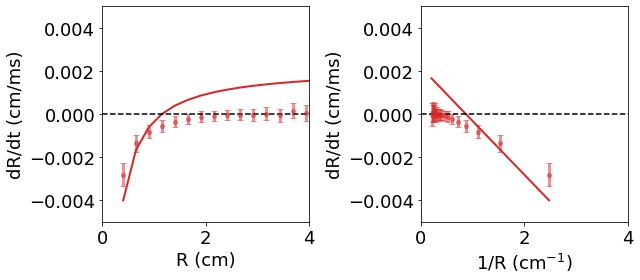

In [35]:
ylim=0.005
#plot mean radial velocities
fig, axs = plt.subplots(ncols=2, figsize=(9, 4))
PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values,c='C3')
# PlotMeanRadialVelocities(axs, x_values2, y_values2, y_err_values2, y_hat_values2,c='C4')
axs[0].set_ylim([-ylim,ylim])
axs[1].set_ylim([-ylim,ylim])
axs[0].plot(x_values-np.min(x_values),0.*x_values,'k--')
axs[1].plot(x_values-np.min(x_values),0.*x_values,'k--')
plt.tight_layout()
plt.show()

In [91]:
#TODO(later): #move this cell to the test folder
# #trivial test to see what happens if a bad int is passed for frame_nxt
# frame_values = np.array(sorted(set(df.frame.values)))
# R_lst, dRdt_lst = comp_radial_velocities_between_frames(
#     df,dist_thresh=dist_thresh,
#     frame=frame_values[-1],
#     frame_nxt=frame_values[-1] + 1,
#     pid=None,
#     distance_L2_pbc=distance_L2_pbc,DS=DS,DT=DT)
# assert (len(R_lst) == 0)
# assert (len(dRdt_lst) == 0)

# #basic test forcomp_radial_velocities_between_frames. if frame_nxt is frame, then dRdt should always be zero...
# random.seed(1234)
# R_lst, dRdt_lst = comp_radial_velocities_between_frames(
#     df, frame=100, frame_nxt=100, pid=None, distance_L2_pbc=distance_L2_pbc,dist_thresh=dist_thresh,DS=DS,DT=DT)
# dRdt_values = np.array(dRdt_lst)
# assert (np.isclose(dRdt_values, 0.).all())

# #basic test forcomp_radial_velocities_between_frames. if frame_nxt is frame, then dRdt should always be zero...
# random.seed(1234)
# frame=frame_values[100]
# R_values, dRdt_values = comp_neighboring_radial_velocities_between_frames(df_raw,frame=frame,num_frames_between=0,
#                             distance_L2_pbc=distance_L2_pbc,dist_thresh=dist_thresh,DS=DS,DT=DT)
# assert(np.isclose(dRdt_values,0.).all())

In [29]:
# #for each frame considered, measure every dRdt and R for a randomly chosen particle
# dRdt_out_lst=[]
# R_out_lst=[]
# for frame in random_frames:
#     R_lst,dRdt_lst = comp_radial_velocities_between_frames(df_raw,frame=frame,frame_nxt=frame+num_frames_between,pid=None)
#     dRdt_out_lst.extend(dRdt_lst)
#     R_out_lst.extend(R_lst)

# fontsize=22
# plt.scatter(R_out_lst,dRdt_out_lst, alpha=0.3)
# plt.plot(x_values, y_values,lw=3,color='C3')

# plt.xlabel('R (cm)',fontsize=fontsize)
# plt.ylabel('dR/dt (cm/ms)',fontsize=fontsize)
# plt.show()
# #DONE: basic test for ^that... try it on 50 random frames
# #DONE: run ^that on many frames...  do the results make sense? 

In [6]:
#DONE: make a dense plot for 1 trial using a daskbag routine on all frames for 1 trial

<function lib.viewer.PlotMeanRadialVelocities.PlotMeanRadialVelocities(axs, x_values, y_values, y_err_values, y_hat_values, alpha=0.5, c='C2', fontsize=18, elinewidth=3, markersize=4, capsize=3, xlim0=[0, 4], xlim1=[0, 4], **kwargs)>